In [1]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
batch_size = 100
img_height = 250
img_width = 250

In [3]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './data/train/',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './data/test/',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    './data/val/',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [4]:
class_names = training_ds.class_names

## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
img_shape = (img_height, img_width, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,include_top=False, weights='imagenet')

base_model.trainable = False

In [13]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [130]:
model.fit(training_ds, validation_data = validation_ds, epochs = 50)

Epoch 1/50
8/8 [==============================] - 38s 4s/step - loss: 0.8216 - accuracy: 0.5449 - val_loss: 0.6038 - val_accuracy: 0.7959
Epoch 2/50
8/8 [==============================] - 29s 4s/step - loss: 0.5734 - accuracy: 0.6941 - val_loss: 0.5408 - val_accuracy: 0.7449
Epoch 3/50
8/8 [==============================] - 27s 3s/step - loss: 0.4011 - accuracy: 0.8344 - val_loss: 0.3606 - val_accuracy: 0.8571
Epoch 4/50
8/8 [==============================] - 28s 4s/step - loss: 0.2412 - accuracy: 0.9001 - val_loss: 0.2419 - val_accuracy: 0.9082
Epoch 5/50
8/8 [==============================] - 28s 4s/step - loss: 0.1503 - accuracy: 0.9482 - val_loss: 0.1789 - val_accuracy: 0.8980
Epoch 6/50
8/8 [==============================] - 24s 3s/step - loss: 0.0980 - accuracy: 0.9659 - val_loss: 0.3014 - val_accuracy: 0.8980
Epoch 7/50
8/8 [==============================] - 27s 3s/step - loss: 0.0644 - accuracy: 0.9785 - val_loss: 0.4848 - val_accuracy: 0.8367
Epoch 8/50
8/8 [==================

In [131]:
model.save('model-new.h5')

In [7]:
from keras.models import load_model


In [15]:
model = load_model('model.h5')

In [16]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    AccuracyVector = np.array(prdlbl) == labels

ValueError: in user code:

    File "c:\Users\Jayacha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\Jayacha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Jayacha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\Jayacha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "c:\Users\Jayacha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Jayacha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 25088), found shape=(None, 250, 250, 3)


<Figure size 2160x2160 with 0 Axes>

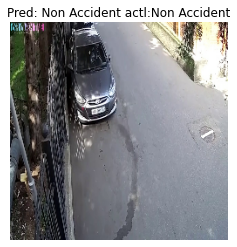

In [ ]:
for i in range(1):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [177]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.001).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

In [181]:
def ass(y):
    x = (y >1).astype("int32")
    x

In [182]:
ass(5)

AttributeError: 'bool' object has no attribute 'astype'

In [178]:
import cv2
image=[]
label=[]
c=1
cap= cv2.VideoCapture('./yes.mp4')
while True:
    ret, frame = cap.read()
    if (ret != True):
        break
    if c%30==0:
        print(c)
        resized_frame=tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
        image.append(frame)
        label.append(predict_frame(resized_frame))
    c+=1

cap.release()

30
1/1 [==============================] - 0s 82ms/step
60
1/1 [==============================] - 0s 45ms/step
90
1/1 [==============================] - 0s 50ms/step
120
1/1 [==============================] - 0s 44ms/step
150
1/1 [==============================] - 0s 107ms/step
180
1/1 [==============================] - 0s 92ms/step
210
1/1 [==============================] - 0s 88ms/step
240
1/1 [==============================] - 0s 76ms/step
270
1/1 [==============================] - 0s 69ms/step
300
1/1 [==============================] - 0s 51ms/step
330
1/1 [==============================] - 0s 41ms/step
360
1/1 [==============================] - 0s 50ms/step
390
1/1 [==============================] - 0s 71ms/step
420
1/1 [==============================] - 0s 54ms/step
450
1/1 [==============================] - 0s 59ms/step
480
1/1 [==============================] - 0s 54ms/step
510
1/1 [==============================] - 0s 53ms/step


In [179]:
label

['Accident Detected',
 'Accident Detected',
 'No Accident',
 'No Accident',
 'No Accident',
 'No Accident',
 'Accident Detected',
 'No Accident',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'Accident Detected',
 'No Accident',
 'No Accident',
 'No Accident',
 'No Accident',
 'No Accident']

AxesImage(54,36;334.8x217.44)


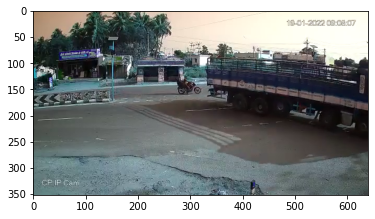

In [180]:
print(plt.imshow(image[1]))

AxesImage(54,36;334.8x217.44)


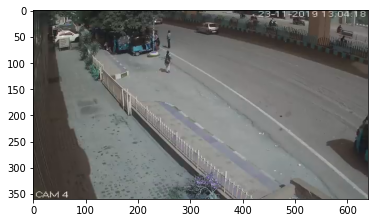

In [37]:
print(plt.imshow(image[7]))

In [155]:
import geocoder
from twilio.rest import Client as client
from geopy.geocoders import Nominatim

In [156]:
geoLoc = Nominatim(user_agent="GetLoc")
g = geocoder.ip('me')
locname = geoLoc.reverse(g.latlng)
account_sid =  'ACba80893d3edb957588f23348a09c20de'#Enter Your account sid
auth_token ='fc04fae78bfb904c53bdff21f823cb39' #Enter your auth token
clientq = client(account_sid, auth_token)

In [ ]:
cap = cv2.VideoCapture('videoplayback.mp4')
i=0
flag=0
while(True):
    ret,frame=cap.read()
    if ret==True:
        if predictions[int(i/15)%9][0]<predictions[int(i/15)%9][1]:
            predict="No Accident"
        else:
            predict="Accident"
            flag=1
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(frame,
                predict,
                (50, 50),
                font, 1,
                (0, 255, 255),
                3,
                cv2.LINE_4)
        cv2.imshow('Frame', frame)
        i=i+1
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
if flag==1:
    clientq.messages.create(
                 body="Accident detected in "+locname.address,
                 from_= '+18066218708',
                 to= '+916382906223'
                )      

# release the cap object
cap.release()
# close all windows
cv2.destroyAllWindows()
